<h1> Accident Detection From CCTV Footage </h1>


## 0. Overview
### Baseline paper :
Large Multi-Modal Foundation Model for Traffic Accident Analysis [https://arxiv.org/pdf/2401.03040 ]
⁠LLM Multimodal Traffic Accident Forecasting [ https://www.mdpi.com/1424-8220/23/22/9225 ]

## Brief Overview:
Multi-Modal Traffic Accident Analysis for Safer Roads:- Develop an innovative model to analyze diverse traffic data, uncover accident root causes, and proactively suggest preventive solutions.

## Description
### The Challenge
Traffic accidents remain a persistent global threat despite extensive safety efforts.
Traditional models often centre on single data sources, failing to capture the complex interplay of factors contributing to accidents.
A holistic, multi-modal approach is needed to understand and mitigate traffic risks effectively.

## The Task
Construct a model that seamlessly integrates and analyzes data from various sources:

1. Vehicular data (speed, GPS, sensor readings)
2. Pedestrian behavior (movement patterns, crossings)
3. CCTV footage (traffic flow, potential incidents)
4. Weather conditions (visibility, precipitation)
5. Road infrastructure (layout, signage, condition)

The model's insights should pinpoint the leading causes of accidents and inform potential preventive measures.

Given a dataset containing multimodal information such as images, videos, and textual descriptions of road scenes, the goal is to develop a robust accident detection system using a Multimodal Language Model (LLM). The system should accurately classify each scene into one of two categories: "no accident" (label 0) or "accident" (label 1).


## Scoring
Data preparation - 20% <br>
Evaluation - 20 % <br>
Plots - 20 % <br>
Model finetuning - 40% <br>

<h1>1. Loading Data</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-05-16 19:18:13.336354: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-16 19:18:13.933296: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 19:18:15.535215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
training_data_dir = os.path.join("/kaggle/input/accident-detection-from-cctv-footage/data/train")
training_data_dir = os.path.join("data/train")

training_data = tf.keras.utils.image_dataset_from_directory(
                            training_data_dir,image_size=(256, 256),
                            seed = 42
                            )

Found 791 files belonging to 2 classes.


In [3]:
#  iterator extracts in each batch of 32 images 
training_data_iterator = training_data.as_numpy_iterator()
training_batch = training_data_iterator.next()

<h1>2. Preprocessing Data </h1>

In [4]:
# Normalizing rgb pixels value between between 0 & 1 
training_data = training_data.map(lambda x,y: (x/255, y))
training_batch = training_data.as_numpy_iterator().next()

# Sanity Check pixel min/max pixel values after normalization
print("Max pixel value : ",training_batch[0].max())
print("Min pixel value : ",training_batch[0].min())

Max pixel value :  1.0
Min pixel value :  0.0


<h2>Loading Validation data for Hyper-parameter Turing</h2>

In [5]:
validation_data_dir = os.path.join("/kaggle/input/accident-detection-from-cctv-footage/data/val")
validation_data_dir = os.path.join("data/val")

validation_data = tf.keras.utils.image_dataset_from_directory(validation_data_dir)
validation_data_iterator = validation_data.as_numpy_iterator()
validation_batch = validation_data_iterator.next()

Found 98 files belonging to 2 classes.


In [6]:
# Normalizing Validation data
validation_data = validation_data.map(lambda x,y: (x/255, y))
validation_batch = validation_data.as_numpy_iterator().next()

# Sanity Check pixel min/max pixel values after normalization
print("Max pixel value : ",validation_batch[0].max())
print("Min pixel value : ",validation_batch[0].min())

Max pixel value :  1.0
Min pixel value :  0.0


<h1> 3. Building CNN Architecture  </h1>


In [7]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

#### Arch-1
Deep CNN With residual connections followed by classifying dense layer

In [9]:
# # Define input layer
# inputs = Input(shape=(256, 256, 3))

# # First Convolutional Block
# x = Conv2D(16, (3,3), 1, activation='relu', padding='same')(inputs)
# x = MaxPooling2D()(x)

# # Second Convolutional Block with residual connection
# conv1 = Conv2D(32, (3,3), 1, activation='relu', padding='same')(x)
# conv2 = Conv2D(32, (3,3), 1, activation='relu', padding='same')(conv1)
# # Adding convolutional layer to match the number of channels
# residual = Conv2D(32, (1, 1), strides=(1, 1), padding='same')(x)
# residual = Add()([residual, conv2])
# x = MaxPooling2D()(residual)

# # Third Convolutional Block with residual connection
# conv3 = Conv2D(16, (3,3), 1, activation='relu', padding='same')(x)
# conv4 = Conv2D(16, (3,3), 1, activation='relu', padding='same')(conv3)
# # Adding convolutional layer to match the number of channels
# residual = Conv2D(16, (1, 1), strides=(1, 1), padding='same')(x)
# residual = Add()([residual, conv4])
# x = MaxPooling2D()(residual)

# # Add another Convolutional Layer
# x = Conv2D(8, (3,3), 1, activation='relu', padding='same')(x)
# x = MaxPooling2D()(x)

# # Flatten layer
# x = Flatten()(x)

# # Fully connected layers
# x = Dense(32, activation='relu')(x)
# x = Dense(16, activation='relu')(x)
# x = Dense(8, activation='relu')(x)
# outputs = Dense(1, activation='sigmoid')(x)

# model = Model(inputs = inputs, outputs=outputs)

## Load older model

In [1]:
from tensorflow.keras.models import load_model

# Provide the path to the saved model
model_path = "/kaggle/working/accidents.keras"
model_path = "model.keras"


# Load the model
loaded_model = load_model(model_path)
model = loaded_model

2024-05-17 12:01:27.829218: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-17 12:01:28.361525: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 12:01:29.787801: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# model = Sequential()

# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# # Adding neural Layer
# model.add(Dense(256, activation='relu'))
# # model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

## Arch - 2
Tweaking the arch

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D())

# Flatten the output for dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/home/l/miniconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 8)    │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       984,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 986,377 (3.76 MB)

 Trainable params: 986,377 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

## Arch - 3

Using residual connections in cnn 
And deeper dense layers

In [4]:
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.models import Model

# # Define input layer
# inputs = Input(shape=(256, 256, 3))

# # First Convolutional Block
# x = Conv2D(16, (3,3), 1, activation='relu', padding='same')(inputs)
# x = MaxPooling2D()(x)

# # Second Convolutional Block
# x = Conv2D(32, (3,3), 1, activation='relu', padding='same')(x)
# x = MaxPooling2D()(x)

# # Third Convolutional Block
# x = Conv2D(16, (3,3), 1, activation='relu', padding='same')(x)
# x = MaxPooling2D()(x)

# # Flatten layer
# x = Flatten()(x)

# # Dense layers
# x = Dense(256, activation='relu')(x)
# # x = Dense(64, activation='relu')(x)
# outputs = Dense(1, activation='sigmoid')(x)

# # Create the model
# model = Model(inputs=inputs, outputs=outputs)

In [5]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics = ['accuracy'])

model.summary()

NameError: name 'Adam' is not defined

<h1> 4.  Training Convolutional Neural Network </h1>

In [ ]:
# early_stopping_callback = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
# bst_model = model.fit(training_data, epochs=5, validation_data=validation_data, callbacks=[early_stopping_callback])

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.5145 - loss: 0.7127 - val_accuracy: 0.6429 - val_loss: 0.6467
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5693 - loss: 0.6795 - val_accuracy: 0.6429 - val_loss: 0.6341
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5782 - loss: 0.6739 - val_accuracy: 0.6531 - val_loss: 0.6308
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6676 - loss: 0.6274 - val_accuracy: 0.6735 - val_loss: 0.6019
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6633 - loss: 0.6006 - val_accuracy: 0.6837 - val_loss: 0.5955


In [ ]:
# setting up for logging 
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
bst_model = model.fit(training_data, epochs=20, validation_data=validation_data, callbacks=[tensorboard_callback])

Epoch 1/2
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.9904 - loss: 0.0393 - val_accuracy: 0.8980 - val_loss: 0.3284
Epoch 2/2
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9962 - loss: 0.0165 - val_accuracy: 0.8980 - val_loss: 0.3343


In [ ]:
model.save("/kaggle/working/accidents.keras")                                                     

In [ ]:
bst_model.history
bst_model.history['val_accuracy'][-1]

0.7142857313156128

<h2>5. Plotting Training Loss and Accuracy Curve with epochs</h2>

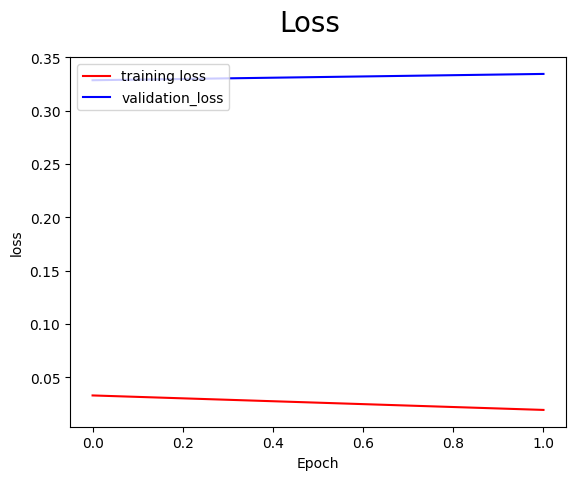

In [ ]:
fig = plt.figure()
plt.plot(bst_model.history['loss'], color='red', label='training loss')
plt.plot(bst_model.history['val_loss'], color='blue', label='validation_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

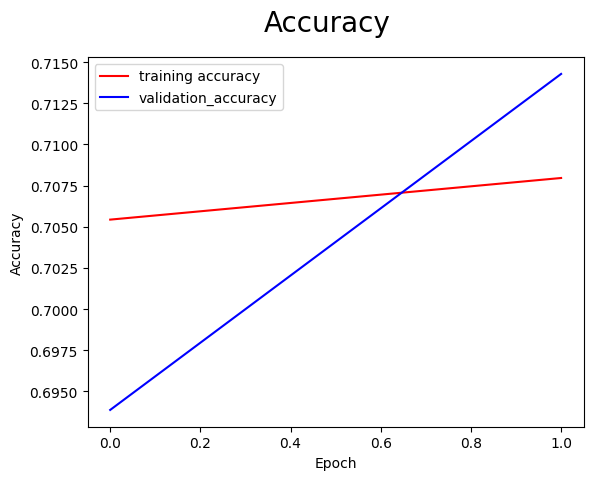

In [ ]:
fig = plt.figure()
plt.plot(bst_model.history['accuracy'], color='red', label='training accuracy')
plt.plot(bst_model.history['val_accuracy'], color='blue', label='validation_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# 6. Evaluation
Model performance will be measured by its F1 scores in predicting and analyzing actual traffic accidents.
Solutions offering actionable insights and demonstrable potential to reduce accident frequency and impact will be favoured.

In [ ]:
test_data_dir = os.path.join("/kaggle/input/accident-detection-from-cctv-footage/data/test")
test_data_dir = os.path.join("data/test")

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()

Found 100 files belonging to 2 classes.


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
warnings.filterwarnings("ignore")


# Provide the path to the saved model
model_path = "/kaggle/working/accidents.keras"
model_path = "model.keras"


# Load the model
loaded_model = load_model(model_path)
model = loaded_model

y_true = []  # true labels
y_pred = []  # predicted labels

for batch in test_data:
    X, y = batch
    yhat = model.predict(X)
    y_pred.extend(yhat.flatten().round().astype(int))
    y_true.extend(np.array(y).flatten().astype(int))  # Convert y to NumPy array

# Calculate evaluation metrics
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

# Print evaluation metrics and confusion matrix
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion Matrix:")
print(cm)

# Generate classification report
target_names = ['Not Accident', 'Accident']
classification_rep = classification_report(y_true, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)


I0000 00:00:1715867328.468113   15385 service.cc:145] XLA service 0x759e80008290 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715867328.468163   15385 service.cc:153]   StreamExecutor device (0): Host, Default Version
2024-05-16 19:18:48.494286: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1715867328.725998   15385 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Precision: 0.9444444444444444
Recall: 0.9622641509433962
F1 score: 0.9532710280373832
Confusion Matrix:
[[44  3]
 [ 2 51]]
Classification Report:
              precision    recall  f1-score   support

Not Accident       0.96      0.94      0.95        47
    Accident       0.94      0.96      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



2024-05-16 19:18:50.089243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# 7. Sanity check on Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


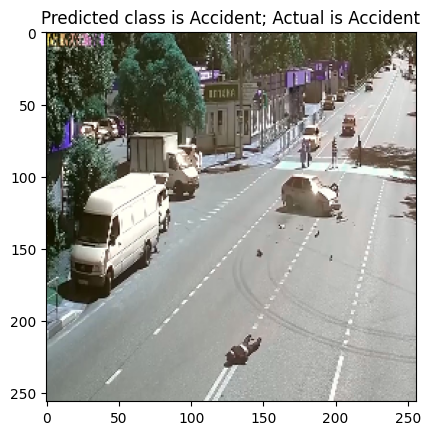

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


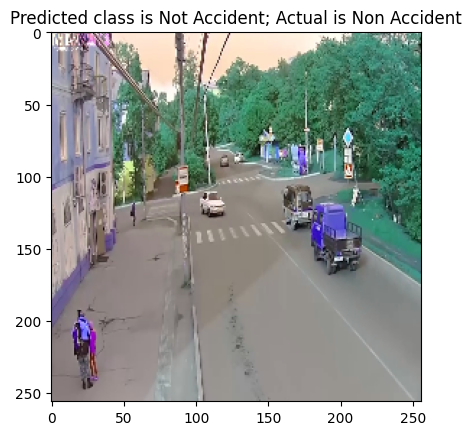

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the directories for each class
class_directories = ["/kaggle/input/accident-detection-from-cctv-footage/data/test/Accident",
                     "/kaggle/input/accident-detection-from-cctv-footage/data/test/Non Accident"]
class_directories = ["data/test/Accident",
                     "data/test/Non Accident"]
# Randomly select one image from each class directory
selected_images = []
for directory in class_directories:
    filenames = os.listdir(directory)
    selected_image = random.choice(filenames)
    selected_image_path = os.path.join(directory, selected_image)
    selected_images.append(selected_image_path)

# Load and resize the selected images
samples = []
for image_path in selected_images:
    sample = cv2.imread(image_path, cv2.IMREAD_COLOR)
    sample = cv2.resize(sample, (256, 256))
    samples.append(sample)

# Perform prediction for each sample
t_label = "Accident"
for sample in samples:
    prediction = 1 - model.predict(np.expand_dims(sample / 255, 0))

    if prediction >= 0.5:
        label = f'Predicted class is Accident; Actual is {t_label}'
    else:
        label = f'Predicted class is Not Accident; Actual is {t_label}'

    plt.title(label)
    plt.imshow(sample)
    plt.show()
    
    t_label = "Non Accident"


### Create CSV Files for Submission

In [ ]:
import cv2
import os
import pandas as pd

# Define the directory containing the test data
test_data_dir = "/kaggle/input/accident-detection-from-cctv-footage/data/test"
test_data_dir = "data/test"

# Initialize lists to store filenames and predictions
filenames = []
labels=[]
predictions = []

# Iterate through subdirectories in the test data directory
for subdir in os.listdir(test_data_dir):
    subdir_path = os.path.join(test_data_dir, subdir)
    c=1
    # Check if the item in the directory is a subdirectory
    if os.path.isdir(subdir_path):
        # Iterate through files in the subdirectory
        for filename in os.listdir(subdir_path):
            # Check if the file is a JPEG image
            if filename.endswith(".jpg"):
                filepath = os.path.join(subdir_path, filename)
                
                # Load and resize the image
                sample = cv2.imread(filepath, cv2.IMREAD_COLOR)
                sample = cv2.resize(sample, (256, 256))
                
                # Predict using the model
                prediction = model.predict(np.expand_dims(sample / 255, 0))
                
                # Assign labels based on the prediction
                output = 1 if prediction >= 0.5 else 0
                
                # Append filename and prediction to lists
                filenames.append(filename)
                predictions.append(output)
                labels.append(c)
    c=0
# Create a DataFrame to store filenames and predictions
df = pd.DataFrame({"ID": filenames, "Column ID": predictions})

# Save the DataFrame to a CSV file
output_csv_path = "/kaggle/working/submission.csv"
output_csv_path = "submission.csv"
df.to_csv(output_csv_path, index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Calculate evaluation metrics
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

# Print evaluation metrics and confusion matrix
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion Matrix:")
print(cm)

# Generate classification report
target_names = ['Not Accident', 'Accident']
classification_rep = classification_report(y_true, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)


Precision: 0.9444444444444444
Recall: 0.9622641509433962
F1 score: 0.9532710280373832
Confusion Matrix:
[[44  3]
 [ 2 51]]
Classification Report:
              precision    recall  f1-score   support

Not Accident       0.96      0.94      0.95        47
    Accident       0.94      0.96      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## Future work

Captions generation through image-to-text model which describes the imgae in details using pre-trained models like 
gpt2 (https://huggingface.co/nlpconnect/vit-gpt2-image-captioning) or 
blip (https://huggingface.co/Salesforce/blip-image-captioning-large)
etc.

>> Using text embedding to train dense layer for classification
>> Add CNN extracted feature 
>> Add other multimodal features (the larger idea of the challege)

In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
img_to_text_model = AutoModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Freeze the model
img_to_text_model.trainable = False

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# from transformers import AutoModel

# class CustomModel(nn.Module):
#     def __init__(self, image_embedding_dim=768):
#         super(CustomModel, self).__init__()
        
#         # Load the pre-trained image-to-text model
#         self.img_to_text_model = AutoModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
        
#         # Freeze the image-to-text model
#         for param in self.img_to_text_model.parameters():
#             param.requires_grad = False
        
#         # Define the CNN architecture for image feature extraction
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
#         # Define the fully connected layer
#         self.fc1 = nn.Linear(in_features=32 * 64 * 64 + image_embedding_dim, out_features=128)
#         self.fc2 = nn.Linear(in_features=128, out_features=1)
        
#     def forward(self, images, text_input):
#         # Process images through CNN
#         x = self.pool(F.relu(self.conv1(images)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 32 * 64 * 64)  # Flatten
        
#         # Process text through the image-to-text model
#         text_outputs = self.img_to_text_model(**text_input).last_hidden_state[:, 0, :]  # Use the CLS token
        
#         # Concatenate image and text embeddings
#         x = torch.cat((x, text_outputs), dim=1)
        
#         # Fully connected layers
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         x = torch.sigmoid(x)
        
#         return x

# # Create an instance of the custom model
# model = CustomModel()
